In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\ADMIN\\OneDrive\\resume p\\My Uber Drives - 2016.csv")
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
df.shape
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [4]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [5]:
df[df['END_DATE*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
#dropping row containing null values
df.drop(df[df['END_DATE*'].isnull()].index,axis=0,inplace=True)

In [7]:
df.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


##### now we have null data only in purpose column
- as we have more than 55% data missing.so iam droping this column and excluding this from this analysis

In [9]:
df.drop(['PURPOSE*'],axis=1,inplace=True)

In [10]:
df.head(2)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0


###### checking the duplicates

In [11]:
df.duplicated().sum()

1

In [12]:
#we will remove the duplicate
df.drop_duplicates(inplace=True,ignore_index=True)

In [13]:
#coverting start_date & end_date columns into datetime
df['START_DATE*']=pd.to_datetime(df['START_DATE*'],format='%m/%d/%Y %H:%M')
df['END_DATE*']=pd.to_datetime(df['END_DATE*'],format='%m/%d/%Y %H:%M')
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
dtype: object

### EDA
- univariate
- 1.Category

In [14]:
df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

In [15]:
df['MILES*'].unique()

array([  5.1,   5. ,   4.8,   4.7,  63.7,   4.3,   7.1,   0.8,   8.3,
        16.5,  10.8,   7.5,   6.2,   6.4,   1.6,   1.7,   1.9,   4. ,
         1.8,   2.4,   2. ,  15.1,  11.2,  11.8,  21.9,   3.9,   8. ,
        10.4,   7.2,   7.6,  17.1,  40.2,   1. ,   2.3,   1.4,   0.5,
        18.7,   3.4,   2.7,  12.9,  19. ,  14.7,  15.7,   4.6,   5.2,
        10.1,   5.8,   5.5,   5.7,  19.4,  23.3,   6. ,   9.7,   1.1,
         9. ,   7.7,  11.4,   3.2,   5.6,   6.1,   5.3,   3. ,   1.5,
        17.3,  13.5,   8.5,   2.6,  17. ,  18. ,   8.4,  11.5,   8.9,
         8.1,  13. ,  13.9,  43.7,  14.1,   4.5,   3.6,  21.4,  23.5,
        12.7,  10. ,  18.3,   7.3,   3.5,   4.2,  13.6,   2.5,  14.4,
        18.4,  23.1,  14.5,   8.8,  22.7,   2.2,  20. ,   3.1,   6.3,
        10.6,   9.9,   6.8,   2.1,   3.8,   6.6,  10.9,   4.9,   6.5,
         7.8,   2.8,  12.4,   5.9,   9.4,  11.9,  12.8,   1.2,  10.5,
        12.5, 136. ,  30.2,  15.5,  12.6,  13.2,   9.2,  12. ,  35.1,
        36.5,  57. ,

#### these are 2 ride-caategories...business for work related & peronal for personal travel

In [16]:
df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*','sum'))

,tot_miles
CATEGORY*,
Business,11477.1
Personal,717.7


Text(0.5, 1.0, 'total miles per category')

<Figure size 640x480 with 0 Axes>

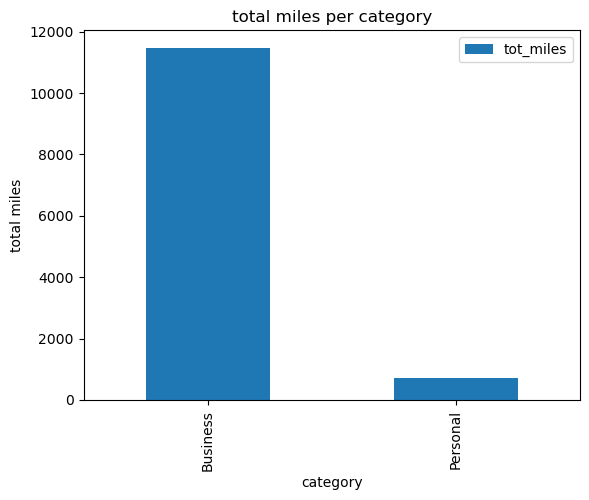

In [17]:
plt.figure()
df[['CATEGORY*','MILES*']].groupby(['CATEGORY*']).agg(tot_miles=('MILES*','sum')).plot(kind='bar')
plt.xlabel('category')
plt.ylabel('total miles')
plt.title('total miles per category')

##### users mainly using uber for business perposes
- Around 94% miles was consumed during business trips
- Only 6% miles were consumed during personal trips

In [18]:
len(df['START*'].unique())

177

###### there are 177 unique starting points

In [19]:
#top 10 start places
df['START*'].value_counts(ascending=False)[:10]

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 places'}, xlabel='Pickup Count', ylabel='Places'>

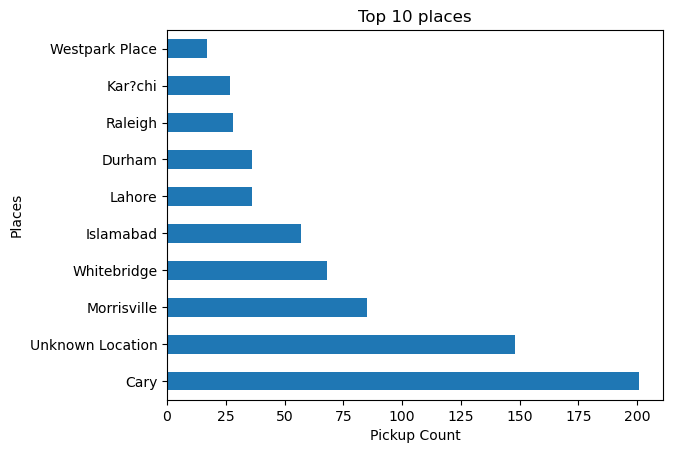

In [20]:
df['START*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Pickup Count',title='Top 10 places')

In [21]:
len(df['STOP*'].unique())

188

###### there are 188 unique drop points

In [22]:
#top 10 stop places
df['STOP*'].value_counts(ascending=False)[:10]

STOP*
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 stop places'}, xlabel='Pickup Count', ylabel='Places'>

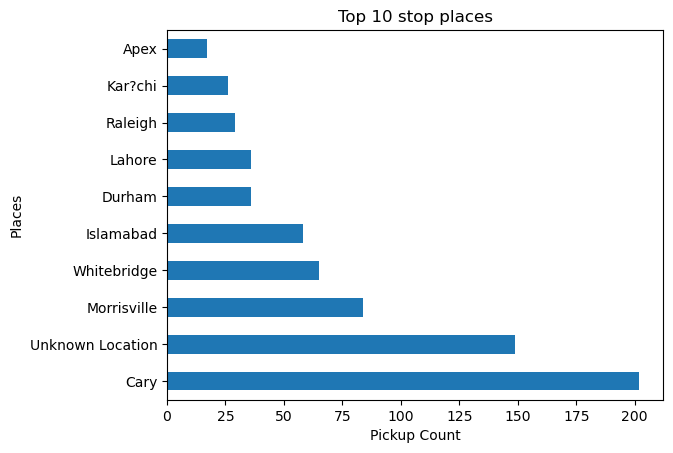

In [23]:
df['STOP*'].value_counts(ascending=False)[:10].plot(kind='barh',ylabel='Places',xlabel='Pickup Count',title='Top 10 stop places')

#### cary is the most popular stop place for this user
may his home is in cary(as mostly start & stop are from here)

In [24]:
df[df['STOP*']=='Unknown Location']['STOP*'].value_counts()

STOP*
Unknown Location    149
Name: count, dtype: int64

In [25]:
df[df['START*']=='Unknown Location']['START*'].value_counts()

START*
Unknown Location    148
Name: count, dtype: int64

##### MILES

<Axes: xlabel='MILES*', ylabel='Count'>

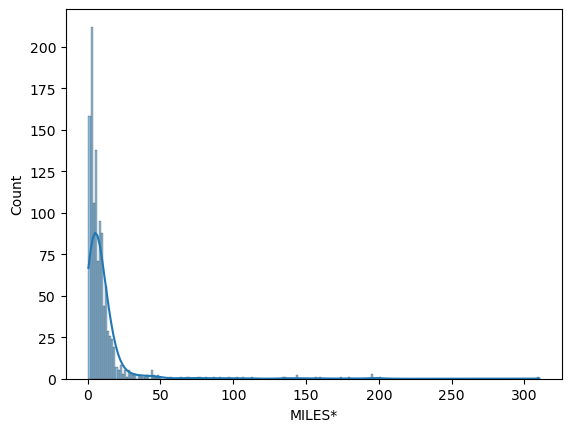

In [26]:
sns.histplot(df['MILES*'],kde=True)

##### miles data is rightly skewed

In [27]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
START_DATE*,1154,2016-07-17 00:07:01.611784960,2016-01-01 21:11:00,2016-03-31 20:23:30,2016-07-21 17:29:30,2016-10-27 21:16:15,2016-12-31 22:08:00,NaN
END_DATE*,1154,2016-07-17 00:30:16.117850880,2016-01-01 21:17:00,2016-03-31 20:52:00,2016-07-21 17:37:00,2016-10-27 21:34:30,2016-12-31 23:51:00,NaN
MILES*,1154.0,10.567418,0.5,2.9,6.0,10.4,310.3,21.588452


##### multivariate analysis

In [28]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7


In [29]:
df.groupby(['START*','STOP*'])['MILES*'].apply(print)

909    2.2
Name: (Agnew, Agnew), dtype: float64
905    4.3
Name: (Agnew, Cory), dtype: float64
907    2.2
910    2.4
Name: (Agnew, Renaissance), dtype: float64
878    15.2
Name: (Almond, Bryson City), dtype: float64
645    1.0
824    3.3
Name: (Apex, Apex), dtype: float64
58      5.5
60      5.7
80      5.7
173     5.6
410     7.2
564     5.5
615     4.6
646     6.0
825     5.3
977     5.4
1013    5.3
1032    8.8
1044    4.7
Name: (Apex, Cary), dtype: float64
854    2.2
Name: (Apex, Eagle Rock), dtype: float64
1000    9.0
Name: (Apex, Holly Springs), dtype: float64
469    17.0
Name: (Arabi, Metairie), dtype: float64
620    4.9
Name: (Arlington, Washington), dtype: float64
612    1.3
Name: (Arlington Park at Amberly, Lexington Park at Amberly), dtype: float64
880    195.9
Name: (Asheville, Mebane), dtype: float64
870    91.8
Name: (Asheville, Topton), dtype: float64
232    136.0
Name: (Austin, Katy), dtype: float64
546     8.3
547     3.2
550     4.5
555    13.0
556     4.4
Name: (Banne

START*         STOP*             
Agnew          Agnew                 None
               Cory                  None
               Renaissance           None
Almond         Bryson City           None
Apex           Apex                  None
                                     ... 
Whitebridge    Wayne Ridge           None
               Westpark Place        None
               Whitebridge           None
               Williamsburg Manor    None
Winston Salem  Asheville             None
Name: MILES*, Length: 363, dtype: object

In [30]:
df.groupby(['START*','STOP*'])['MILES*'].sum().sort_values(ascending=False)[1:11]

START*            STOP*           
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES*, dtype: float64

##### cary-durham & cary-morrisville and vice versa are the farthest distance ride



-checking for round trip

<Axes: xlabel='ROUND_TRIP*', ylabel='count'>

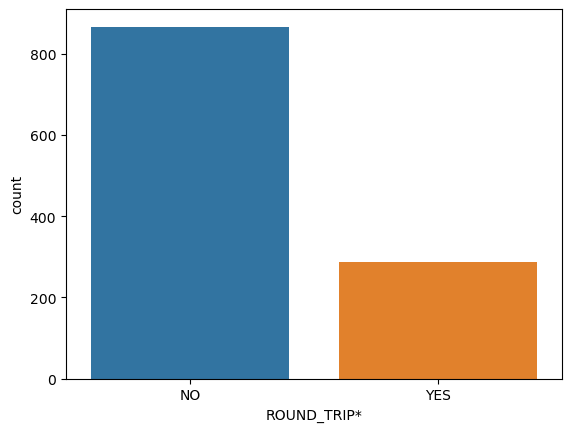

In [31]:
def is_roundtrip(df):
    if df['START*']==df['STOP*']:
        return 'YES'
    else:
        return 'NO'
df['ROUND_TRIP*']=df.apply(is_roundtrip,axis=1)
sns.countplot(x='ROUND_TRIP*',data=df,order=df['ROUND_TRIP*'].value_counts().index)

# my analysis on this project

 ##### users mainly using uber for business perposes- 1. 
Around 94% miles was consumed during business tris
- 2. 
Only 6% miles were consumed during personal trip##### There are 177 unique starting points 

##### there are 188 unique drop points

##### cary is the most popular stop place for this user 
may his home is in cary(as mostly start & stop are from here

##### cary-durham & cary-morrisville and vice versa are the farthest distance ride

s
